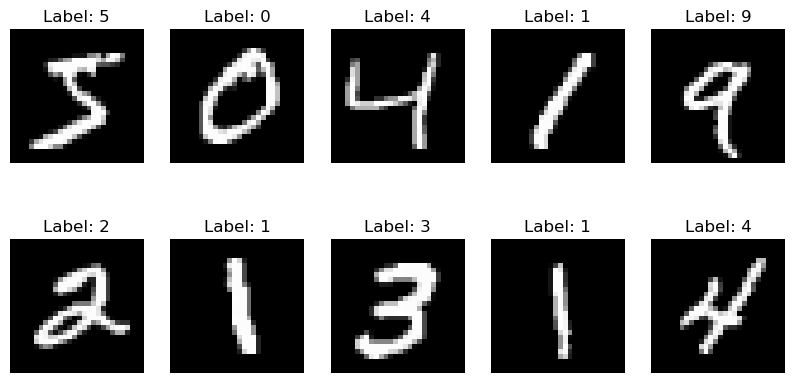

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Afficher quelques images du jeu de données
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
# Normalisation des données (échelle de 0 à 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Remodeler les données pour qu'elles aient la forme (n_samples, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Conversion des labels en format one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construction du modèle
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()


/Users/ratibakadi/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)


Epoch 1/10
375/375 - 10s - 27ms/step - accuracy: 0.8956 - loss: 0.3397 - val_accuracy: 0.9773 - val_loss: 0.0796
Epoch 2/10
375/375 - 9s - 25ms/step - accuracy: 0.9670 - loss: 0.1127 - val_accuracy: 0.9835 - val_loss: 0.0541
Epoch 3/10
375/375 - 9s - 24ms/step - accuracy: 0.9756 - loss: 0.0839 - val_accuracy: 0.9865 - val_loss: 0.0456
Epoch 4/10
375/375 - 8s - 22ms/step - accuracy: 0.9806 - loss: 0.0658 - val_accuracy: 0.9888 - val_loss: 0.0406
Epoch 5/10
375/375 - 8s - 22ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9879 - val_loss: 0.0422
Epoch 6/10


In [ ]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


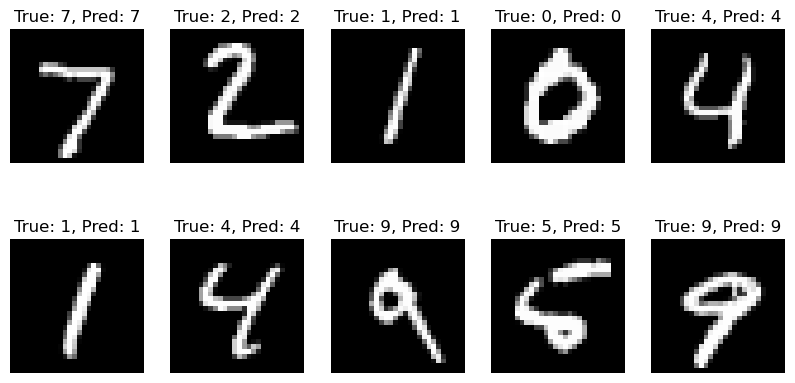

In [12]:
# Prédictions sur les données de test
predictions = model.predict(X_test)

# Affichage des résultats pour quelques images de test
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()}, Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()


In [13]:
model.save('/Users/ratibakadi/Downloads/modele.h5')

In [14]:
model.save('/Users/ratibakadi/Downloads/modele.keras')
